In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
image_size = (224,224)
batch_size = 32

# TRAIN_VALIDATION_SPLIT

In [3]:
train_data = tf.keras.utils.image_dataset_from_directory(
                directory = r"C:\Users\Bhaypreet\OneDrive\Pictures\IIT ROPAR\data_science_projects\INDIAN FOOD\Indian Food Images",
                image_size = image_size,
                batch_size = 32,
                validation_split=0.2,
                subset="training",
                seed=123   
)

val_data = tf.keras.utils.image_dataset_from_directory(
                directory = r"C:\Users\Bhaypreet\OneDrive\Pictures\IIT ROPAR\data_science_projects\INDIAN FOOD\Indian Food Images",
                image_size = image_size,
                batch_size = 32,
                validation_split=0.2,
                subset="validation",
                seed=123   
)

class_names = train_data.class_names

# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.Rescaling(1./255),
#     tf.keras.layers.RandomFlip("horizontal"),
#     tf.keras.layers.RandomRotation(0.1),
#     tf.keras.layers.RandomZoom(0.1),
#     tf.keras.layers.RandomContrast(0.1),
# ])

# train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))
# val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 4000 files belonging to 80 classes.
Using 3200 files for training.
Found 4000 files belonging to 80 classes.
Using 800 files for validation.


# EfficientNet

In [4]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape= (224,224,3))
base_model.trainable = False

model_Efficient = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

model_Efficient.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Normalization

In [5]:
from tensorflow.keras.applications.efficientnet import preprocess_input

def normalizer_efficient(image, label):
    image = preprocess_input(image)  
    return image, label

In [7]:
train_data_eff = train_data.map(normalizer_efficient)
val_data_eff = val_data.map(normalizer_efficient)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

earlystop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1)
reduce_LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6, verbose=1)


# Training_Starts

In [9]:
history1 = model_Efficient.fit(
    train_data_eff,
    validation_data=val_data_eff,
    epochs=20,callbacks = [reduce_LR,earlystop])

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.0499 - loss: 4.2296 - val_accuracy: 0.3075 - val_loss: 3.1372 - learning_rate: 0.0010
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.2747 - loss: 2.9784 - val_accuracy: 0.4412 - val_loss: 2.3189 - learning_rate: 0.0010
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.4045 - loss: 2.2195 - val_accuracy: 0.5063 - val_loss: 1.9904 - learning_rate: 0.0010
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.5107 - loss: 1.8518 - val_accuracy: 0.5425 - val_loss: 1.7869 - learning_rate: 0.0010
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.5602 - loss: 1.6096 - val_accuracy: 0.5562 - val_loss: 1.6878 - learning_rate: 0.0010
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.6312 - loss: 1.4155 - val_accuracy: 0.5688 - val_loss: 1.6151 - learning_rate: 0.0010
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.6361 - loss: 1.

# Accuracy/Loss 

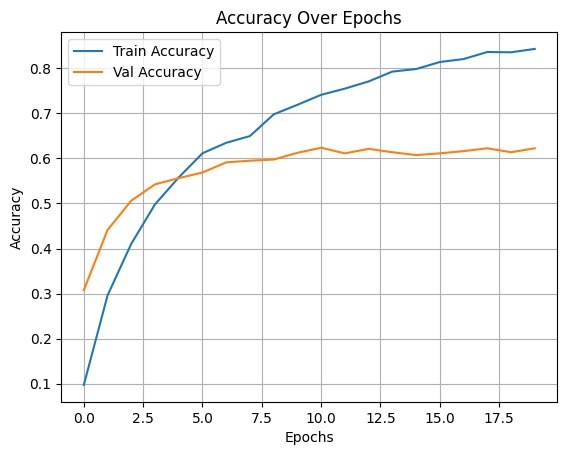

In [12]:
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

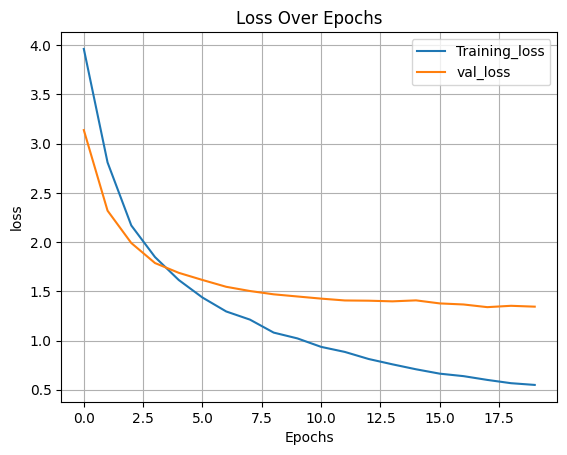

In [13]:
plt.plot(history1.history['loss'], label='Training_loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
model_Efficient.save("Efficient_Model.h5")


In [17]:
# J